In [1]:
import os
import pandas as pd
from feat import Detector
from PIL import Image
import numpy as np

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
# define the models
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "xgb"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

INFO:root:Loading Face model: retinaface
INFO:root:Loading Facial Landmark model: mobilenet
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
INFO:root:Loading facepose model: img2pose
INFO:root:Loading AU model: xgb
INFO:root:Loading emotion model: resmasknet
INFO:root:Loading Identity model: facenet


### Single image

In [3]:
image_path = "../data/CityInfant/BlackWhite/B2NeuBW.bmp"
image_prediction = detector.detect_image(image_path) #, data_type = 'image', face_detection_threshold=0.5)
aus = image_prediction.aus

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 686, 641]) to 224
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 624, 608]) to 224
INFO:root:detecting poses...
INFO:root:detecting aus...


: 

In [6]:
# Function to convert BMP to JPEG
def convert_bmp_to_jpeg(image_path):
    if image_path.lower().endswith(".bmp"):
        jpeg_path = image_path.replace(".bmp", ".jpeg")  # Change extension
        with Image.open(image_path) as img:
            img.convert("RGB").save(jpeg_path, "JPEG")
        return jpeg_path
    return image_path  

image_jpeg = convert_bmp_to_jpeg(image_path)

In [9]:
pred2 = detector.detect_image(image_jpeg, datatype="image")
pred2

  0%|          | 0/1 [00:00<?, ?it/s]INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 690, 641]) to 224
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 638, 614]) to 224
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 626, 547]) to 224
INFO:root:detecting poses...
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 690, 641]) to 112
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 638, 614]) to 112
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescali

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_505,Identity_506,Identity_507,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame
0,250.034890,409.397564,508.385387,575.706264,0.999337,143.143844,144.058551,150.053327,159.854798,184.976873,...,-0.013494,0.034985,-0.000974,-0.003028,0.013813,-0.085595,0.046538,0.026411,../data/CityInfant/BlackWhite/B2NeuBW.jpeg,0
1,42.424536,468.118641,507.099834,533.266735,0.997128,43.006228,48.164132,60.884368,82.316265,123.573063,...,-0.023921,0.042969,0.009871,0.013152,-0.011961,-0.084279,0.049721,0.024306,../data/CityInfant/BlackWhite/B2NeuBW.jpeg,0
2,305.774925,262.739367,522.028343,483.659376,0.631596,419.330128,434.231295,454.025638,481.551844,510.533351,...,-0.030593,0.028973,0.021141,-0.017664,0.050897,-0.005413,-0.017409,0.042985,../data/CityInfant/BlackWhite/B2NeuBW.jpeg,0


[<Figure size 1500x700 with 3 Axes>]

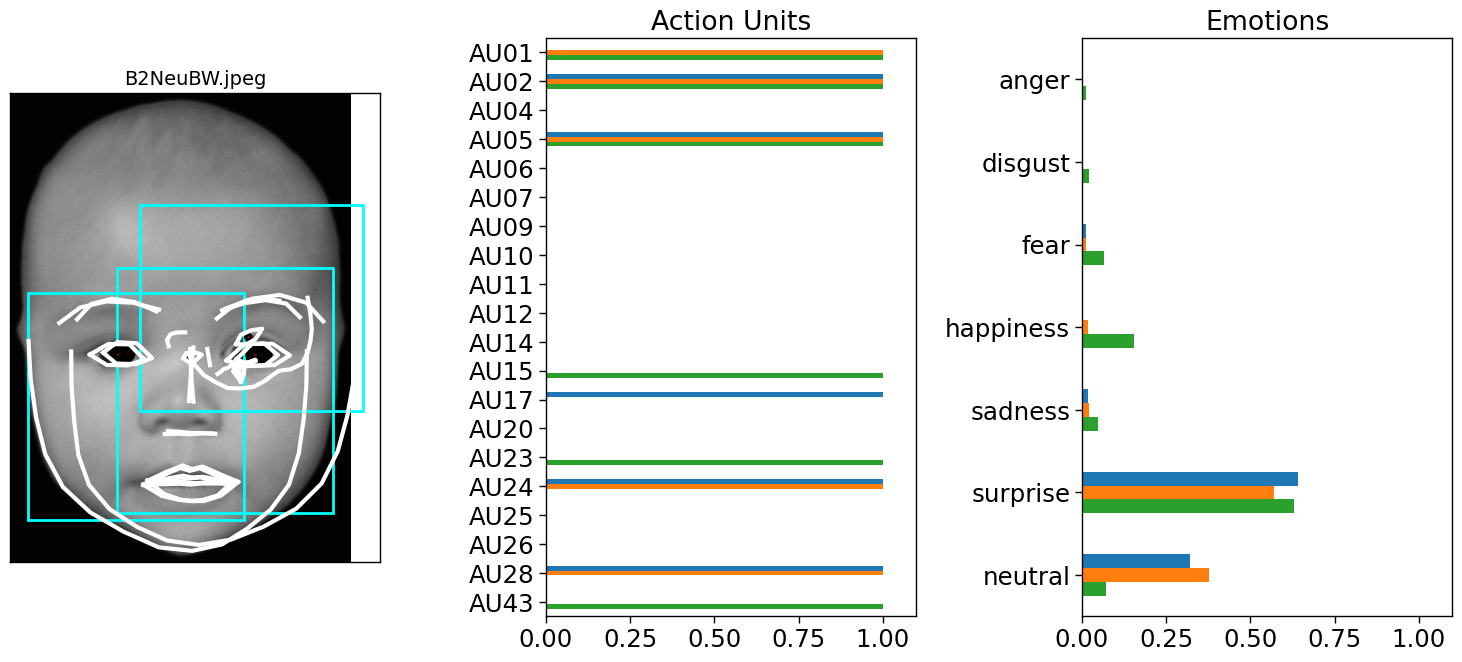

In [10]:
pred2.plot_detections()

In [11]:
# Detect AU
def process_images_to_dataframe(folder_path):
    data_list = []

    # # Loop through each image in the folder
    # for file in os.listdir(folder_path):
    #     if file.endswith(".bmp") or file.endswith(".jpg"):
    #         image_path = os.path.join(folder_path, file)

    #         # Load image using PIL
    #         try:
    #             pil_image = Image.open(image_path)
    #             image = np.array(pil_image)
    #         except FileNotFoundError:
    #             raise ValueError(f"Image at {image_path} cannot be loaded. Please check the file path.")
            
    pil_image = Image.open(folder_path)
    image = np.array(pil_image)

    # Detect faces and landmarks
    face_detection = detector.detect_faces(image)
    landmarks = detector.detect_landmarks(image, detected_faces=face_detection)
    poses = detector.detect_facepose(image)

    # Detect AUs using landmarks
    aus = detector.detect_aus(image, landmarks)

    # Create a dictionary with the results
    result = {
        'Face Detection': face_detection,
        'Landmarks': landmarks,
        'Pose': poses,
        'AUs': aus
    }
    data_list.append(result)

    # Convert list of dictionaries to a DataFrame
    df = pd.DataFrame(data_list)
    return aus

df_results = process_images_to_dataframe(image_path)
# df_results will contain the processed data


INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 686, 641]) to 224
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 624, 608]) to 224
INFO:root:detecting poses...
INFO:root:detecting aus...


In [12]:
df_results

[array([[1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
         0., 0., 1., 0.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 1., 0.]])]